In [1]:
# pip install pixellib

In [2]:
# !pip install pillow==4.1.1
# %reload_ext autoreload
# %autoreload

In [3]:
#pixellib 안되면 이거 다시 키기

!pip install -U pycocotools pixellib
%cd /content
!rm -rf PixelLib
!git clone https://https://github.com/youungg/PixelLib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.3/430.3 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

/content
Cloning into 'PixelLib'...
fatal: unable to access 'https://https://github.com/youungg/PixelLib/': Could not resolve host: https


In [4]:
# 이걸로 from pixellib.semantic import semantic_segmentation 이부분 에러 나는거 수정

import os
import fileinput

# Define the path to the file that needs to be modified
FILE_PATH = "/usr/local/lib/python3.10/dist-packages/pixellib/semantic/deeplab.py"

# Define the old and new strings that need to be replaced
OLD_STRING = "tensorflow.python.keras"
NEW_STRING = "tensorflow.keras"

# Use fileinput to replace the old string with the new string in the file
for line in fileinput.input(FILE_PATH, inplace=True):
    print(line.replace(OLD_STRING, NEW_STRING), end='')

# Define the old and new strings that need to be replaced
# This handles model loading errors
OLD_STRING = "tensorflow.keras.utils.layer_utils import get_source_inputs"
NEW_STRING = "tensorflow.python.keras.utils.layer_utils import get_source_inputs"

# Use fileinput to replace the old string with the new string in the file
for line in fileinput.input(FILE_PATH, inplace=True):
    print(line.replace(OLD_STRING, NEW_STRING), end='')

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/aiffel/my_photo

Mounted at /content/drive
/content/drive/MyDrive/aiffel/my_photo


In [6]:
# %cd /content/PixelLib
# !curl -LO https://github.com/ayoolaolafenwa/PixelLib/releases/download/0.2.0/pointrend_resnet50.pkl

In [7]:
# package

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [8]:
# model

model_file = './deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [9]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [10]:
# BGR2RGB 귀찮 바로 뽑아
def get_seg_color (label_name) :


  # 아래 코드를 이해하지 않아도 좋습니다
  # PixelLib에서 그대로 가져온 코드입니다
  # 주목해야 할 것은 생상 코드 결과물이예요!

  #컬러맵 만들기
  colormap = np.zeros((256, 3), dtype = int)
  ind = np.arange(256, dtype=int)

  for shift in reversed(range(8)):
    for channel in range(3):
      colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  #colormap[:20] #생성한 20개의 컬러맵 출력

  index = LABEL_NAMES.index(label_name)  # 데이터 라벨 인덱스
  seg_color = colormap[index].tolist()  # BGR
  seg_color = seg_color[::-1]  # BGR2RGB

  return seg_color  # RGB


In [11]:
# 그림그리기
def fig (img , cmap = None) :
  plt.imshow(img, cmap)
  plt.show
  print(img.shape)

In [12]:
def cvt_clr(img):
  return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

(4032, 3024, 3)


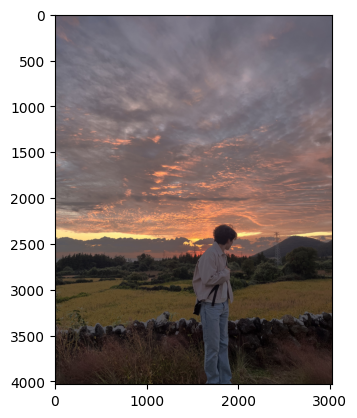

In [13]:
# get img
me_bgr_path = './me.jpg'
me_bgr = cv2.imread(me_bgr_path)
me_rgb = cv2.cvtColor(me_bgr, cv2.COLOR_BGR2RGB)

fig(me_rgb)

In [14]:
# 모델 입력
segvalues, output = model.segmentAsPascalvoc(me_bgr_path)

1/1 [==============================] - 12s 12s/step


In [15]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cow
person
sheep


(4032, 3024, 3)


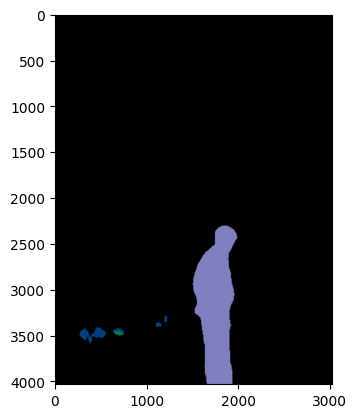

In [16]:
fig(output)

소, 양이 있다?!?!?!?!?!?!?

이거 찍는곳이 제주긴 해도 못봤는데,,,,,

무섭잖어

(4032, 3024)


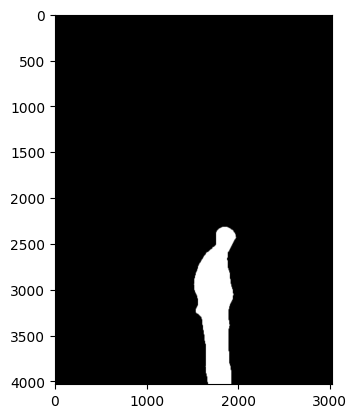

In [17]:
seg_color = get_seg_color('person')
seg_map = np.all(output==seg_color, axis=-1)
fig(seg_map,'gray')

In [18]:
# 차이두기 (사람 vs 배경)
# 얘도 def 가능 할거 같음 input으로 img 두고 copy 뜨고 output으로  img_show

# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
me_show = me_bgr.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
me_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(me_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
me_show = cv2.addWeighted(me_show, 0.6, color_mask, 0.4, 0.0)

(4032, 3024, 3)


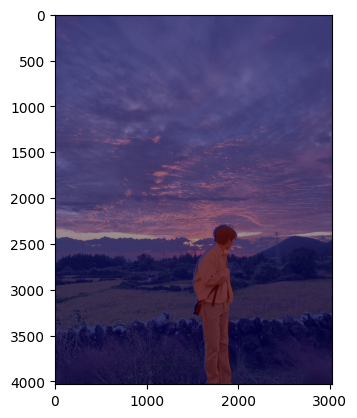

In [19]:
fig(cvt_clr(me_show))

(4032, 3024, 3)


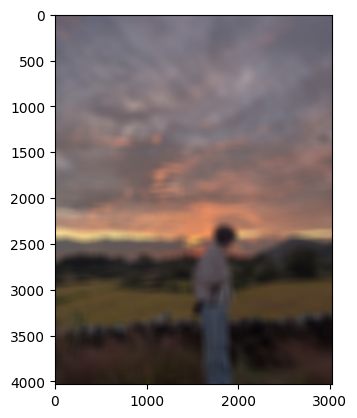

In [20]:
# blurring kernel size = (100,100)
me_blur = cv2.blur(me_bgr, (100,100))

fig(cvt_clr(me_blur))

(4032, 3024, 3)


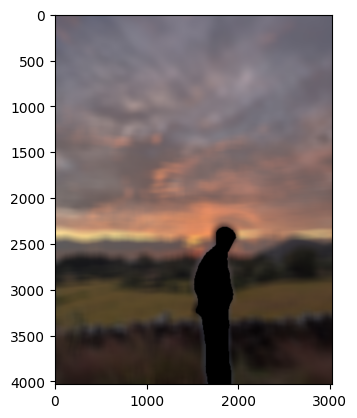

In [21]:
me_mask_color = cv2.cvtColor(me_mask, cv2.COLOR_GRAY2BGR)
me_bg_mask = cv2.bitwise_not(me_mask_color)
me_bg_blur = cv2.bitwise_and(me_blur, me_bg_mask)

fig(cvt_clr(me_bg_blur))

(4032, 3024, 3)


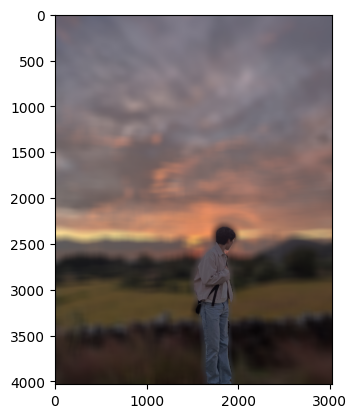

In [22]:
me_bgr_cp = me_bgr.copy()
me_concat = np.where(me_mask_color==255, me_bgr_cp, me_bg_blur)

fig(cvt_clr(me_concat))

문제점 : 사람이 블러 처리됨

(458, 600, 3)


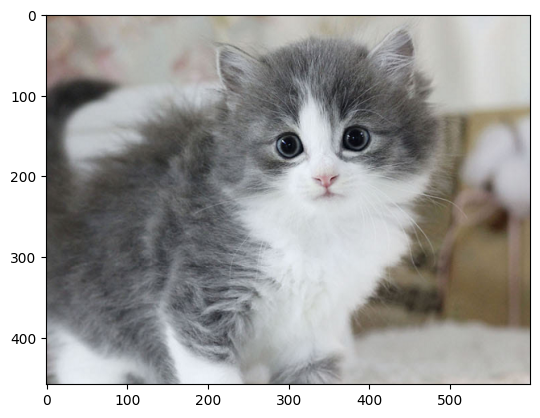

In [23]:
cat_bgr_path = './cat.png'
cat_bgr = cv2.imread(cat_bgr_path)
cat_rgb =cvt_clr(cat_bgr)

fig(cat_rgb)



In [24]:
# model 입력
segvalues, output = model.segmentAsPascalvoc(cat_bgr_path)

1/1 [==============================] - 0s 34ms/step


In [25]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


(458, 600, 3)


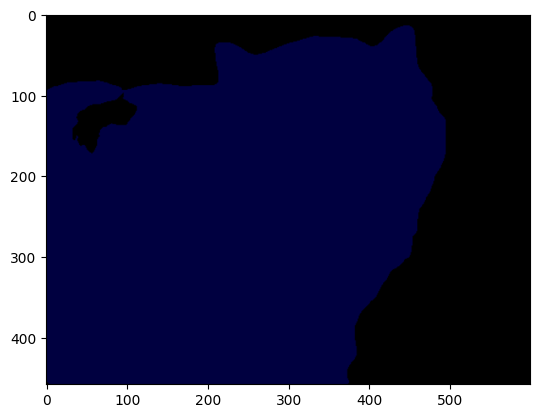

In [26]:
fig(output)

(458, 600)


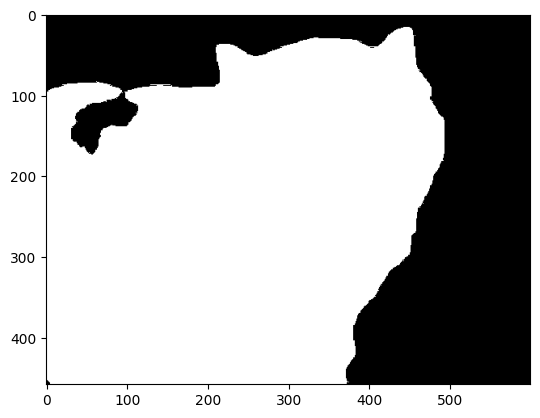

In [27]:
seg_color = get_seg_color('cat')
seg_map = np.all(output==seg_color, axis=-1)
fig(seg_map,'gray')

In [35]:
# 차이두기 (사람 vs 배경)

def bgr2weight(img) :

# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
  img_show = img.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
  img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
  color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
  img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

  return img_mask, img_show

(458, 600, 3)


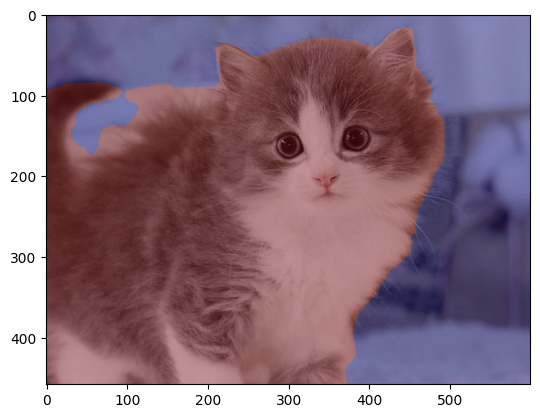

In [36]:
cat_mask, cat_show = bgr2weight(cat_bgr)

fig(cvt_clr(cat_show))

(458, 600, 3)


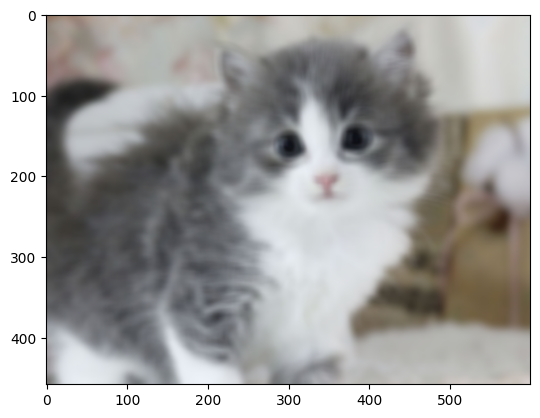

In [30]:
cat_blur = cv2.blur(cat_bgr, (10,10))

fig(cvt_clr(cat_blur))

(458, 600, 3)


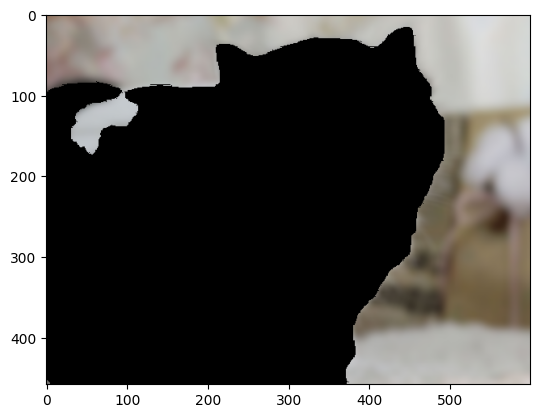

In [37]:
cat_mask_color = cv2.cvtColor(cat_mask, cv2.COLOR_GRAY2BGR)
cat_bg_mask = cv2.bitwise_not(cat_mask_color)
cat_bg_blur = cv2.bitwise_and(cat_blur, cat_bg_mask)

fig(cvt_clr(cat_bg_blur))

(458, 600, 3)


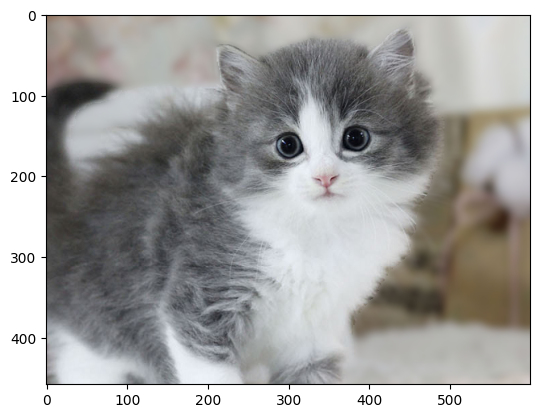

In [38]:
cat_bgr_cp = cat_bgr.copy()
cat_concat = np.where(cat_mask_color==255, cat_bgr_cp, cat_bg_blur)

fig(cvt_clr(cat_concat))

In [45]:
#bg
bg_path = './space.jpg'
bg_bgr = cv2.imread(bg_path)

plt.imread 를 사용하면 bgr로 안바뀌고 그림이 출력 된다

cv2.imread 를 사용하면 bgr로 바뀐다.

(641, 1140, 3)


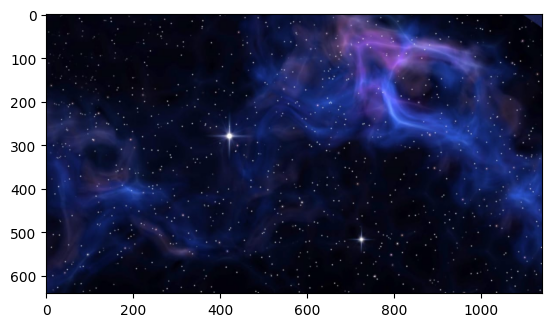

In [47]:
fig(cvt_clr(bg_bgr))

(458, 600, 3)


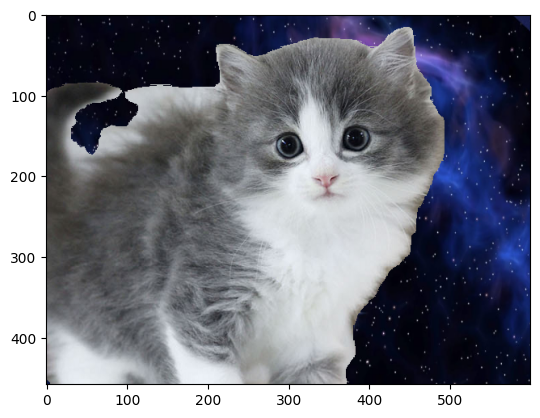

In [50]:
cat_bgr_cp1 = cat_bgr.copy()
bg_bgr = cv2.resize(bg_bgr, dsize=(600, 458), interpolation=cv2.INTER_LINEAR)
cat_concat = np.where(cat_mask_color==255, cat_bgr_cp1, bg_bgr)

fig(cvt_clr(cat_concat))

털 삐져나온 부분 전체를 객체로 인식한다

이거는 하나씩 제거를 못하겠지?

3 semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 이유와 함께 제시
우선 오류를 보완하기 위해서는 2D이미지는 사물까지의 거리(심도)를측정할 수 없기 때문에
배경과의 구분을 위해 Depth를 추가해주는 작업이 필요하다.

객체를 분리 후 각 객체에 depth estimator 추가(소프트웨어)


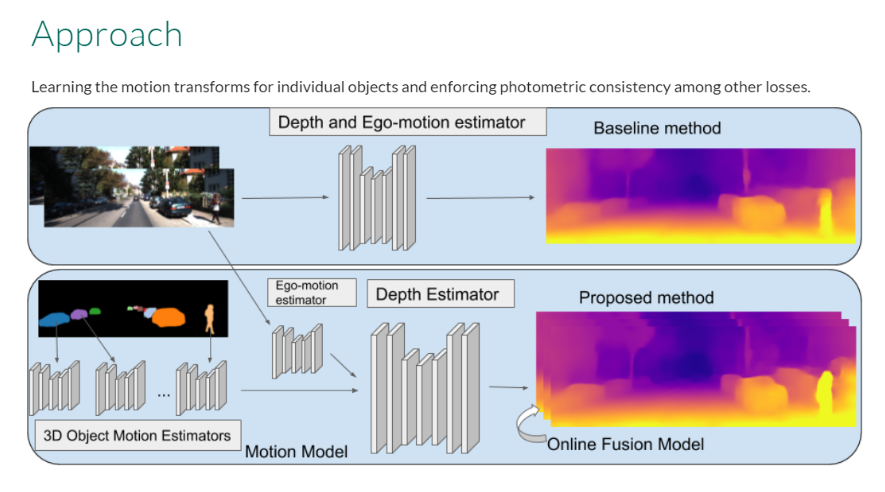




- 3d 렌즈를 사용(하드웨어)

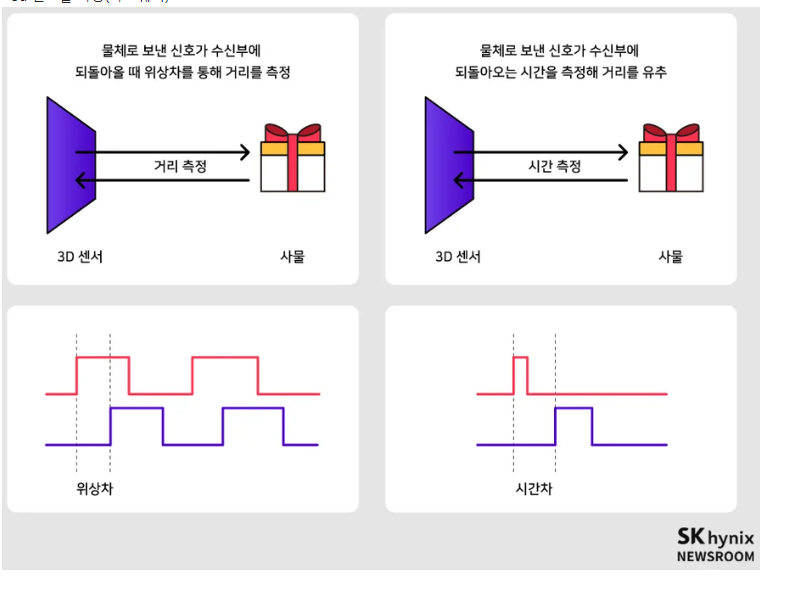




- 2D 사진 여러장을 합성하여 3D객체화 (NeRF, Volume Rendering),(눈의 좌안 우안에서의 시차, CAD와 같이 Front,Side,Top view의 합성)


위의 방법들로 2D이미지에 Depth를 추가하여 3D이미지와 같은 output값을 얻어 처리하면 semantic segmentation mask의 오류, 심도 측정에서의 문제가 어느정도 해결이 되면서 경계가 흐릿해지거나 배경에서의 물체가 같이 인식되는 현상이 줄어들 것으로 예상됩니다.

---

(458, 600, 3)


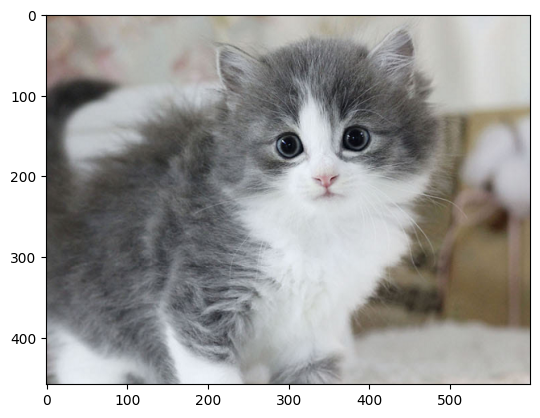

In [52]:
cat_bgr_cp2 = cat_bgr.copy()
fig(cvt_clr(cat_bgr_cp2))

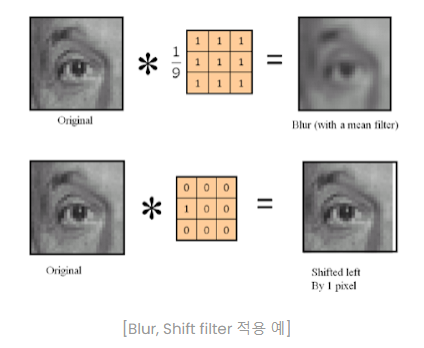

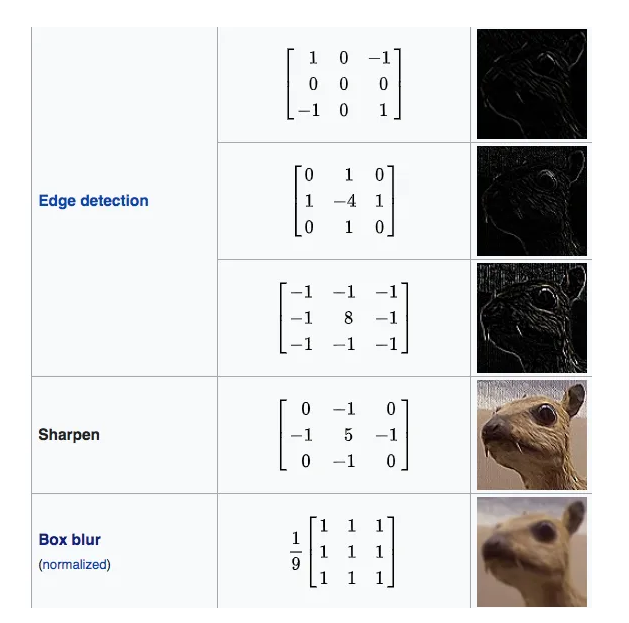

(458, 600, 3)


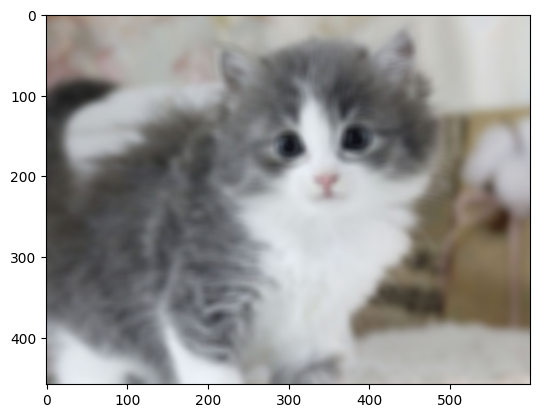

In [54]:
# 5x5 평균 필터 커널 생성  ---②
kernel = np.ones((10,10))/10**2
# 필터 적용             ---③
blured = cv2.filter2D(cat_bgr_cp2, -1, kernel)

# 결과 출력
fig(cvt_clr(blured))

위에 내용 쓰면 하고싶은 conv 해서 그림 표현 가능

흠,,,, tf.keras.conv2d() => 얘로 convolution 하는 거 나중에 만들어 보자

---

# 회고

cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 를 사용 안하고 바꾸는 일은 매우 힘든 일이다.

해보려 하는데 쉽지않음

index = LABEL_NAMES.index(label_name)  # 데이터 라벨 인덱스
seg_color = colormap[index].tolist()  # BGR
seg_color = seg_color[::-1]  # BGR2RGB

이렇게 수정하면 될 줄 알았는데 생각과 다름

blur는 바로위 코드로 수정하면 conv 가능하다.

---

# 일기

2023-11-27 (월) 날씨 흐림

곧 12월, 곧 크리스마스



